In [22]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
from scipy import stats 
from collections import Counter

import missingno as msno 
plt.style.use('seaborn') 

import warnings 
warnings.filterwarnings("ignore") 

mpl.rcParams['axes.unicode_minus'] = False # 그래프에서 마이너스 폰트가 깨지는 것에 대한 대처
%matplotlib inline

from scipy.stats import chi2_contingency

In [90]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [91]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 29 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   year           900000 non-null  int64  
 1   id             900000 non-null  int64  
 2   target_sex     900000 non-null  int64  
 3   target_age     900000 non-null  int64  
 4   sido           900000 non-null  int64  
 5   height         900000 non-null  int64  
 6   weight         900000 non-null  int64  
 7   waist          899762 non-null  float64
 8   sight_L        899839 non-null  float64
 9   sight_R        899833 non-null  float64
 10  hear_L         899859 non-null  float64
 11  hear_R         899861 non-null  float64
 12  bp_high        899982 non-null  float64
 13  bp_low         899983 non-null  float64
 14  blds           899962 non-null  float64
 15  tot_chole      899962 non-null  float64
 16  triglyceride   899960 non-null  float64
 17  hdl_chole      899961 non-nul

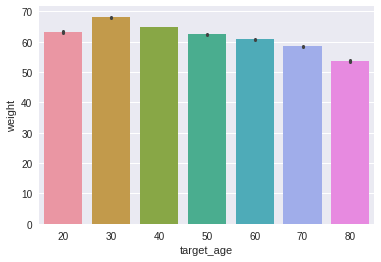

In [4]:
sns.barplot(data=df_train, x='target_age', y='weight')

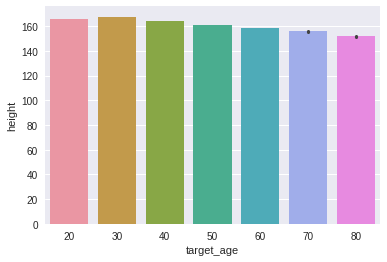

In [6]:
sns.barplot(data=df_train, x='target_age', y='height')

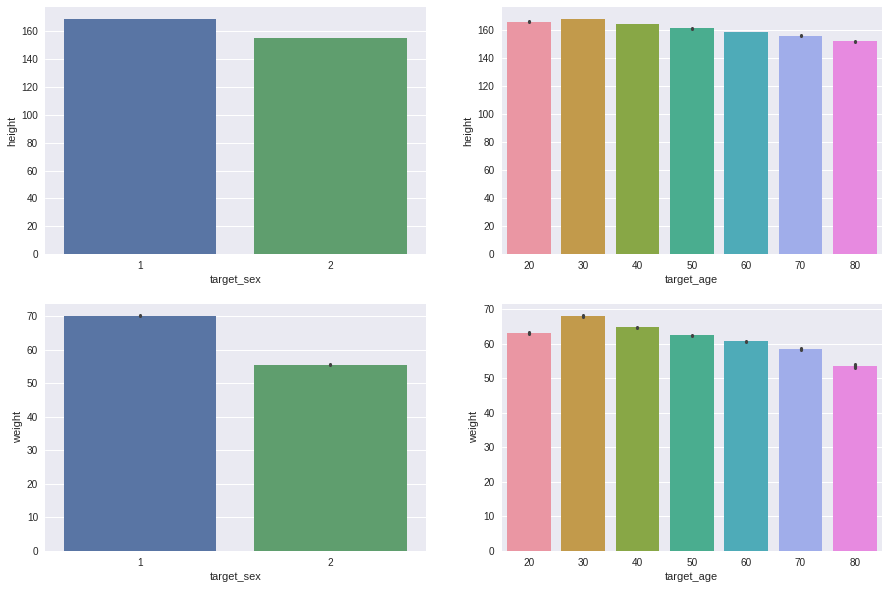

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

sns.barplot(data=df_train, x='target_sex', y='height', ax=ax[0][0])
sns.barplot(data=df_train, x='target_sex', y='weight', ax=ax[1][0])
sns.barplot(data=df_train, x='target_age', y='height', ax=ax[0][1])
sns.barplot(data=df_train, x='target_age', y='weight', ax=ax[1][1])

In [ ]:
'''
교차 검증
범주형- 범주형 비교 분석하기

1. target_sex와 sido, hear_L, hear_R, drk_yn, hchk_yn', 'ttr_yn'
# 1- 남성, 2-여성

2. target_age와 sido, hear_L, hear_R, drk_yn, hchk_yn', 'ttr_yn'
'''

In [12]:
categorical_feautures = df_train[['target_sex', 'target_age', 'sido', 
                                  'hear_L', 'hear_R', 
                                  'drk_yn', 'hchk_yn', 'ttr_yn']]

In [13]:
pd.crosstab(df_train['target_sex'], df_train['sido'], margins=True)
# margins =True는 행과 열의 값을 sum한 합계가 추가됨

sido,11,26,27,28,29,30,31,36,41,42,43,44,45,46,47,48,50,All
target_sex,,,,,,,,,,,,,,,,,,
1,8829,3556,2455,3269,1531,1532,1552,238,13606,1631,1897,2473,2005,2009,3105,3784,505,53977
2,9133,3435,2306,2681,1299,1447,969,202,11414,1461,1612,1930,1750,1785,2554,3037,527,47542
All,17962,6991,4761,5950,2830,2979,2521,440,25020,3092,3509,4403,3755,3794,5659,6821,1032,101519


In [16]:
pd.crosstab(df_train['target_sex'], df_train['hear_L'], margins=True)
# 1 정상, 2 비정상

hear_L,1.0,2.0,All
target_sex,,,
1,52222,1747,53969
2,46067,1465,47532
All,98289,3212,101501


In [17]:
pd.crosstab(df_train['target_sex'], df_train['hear_R'], margins=True)

hear_R,1.0,2.0,All
target_sex,,,
1,52319,1651,53970
2,46070,1462,47532
All,98389,3113,101502


In [18]:
pd.crosstab(df_train['target_sex'], df_train['drk_yn'], margins=True)

drk_yn,N,Y,All
target_sex,,,
1,17726,36232,53958
2,33077,14440,47517
All,50803,50672,101475


In [19]:
pd.crosstab(df_train['target_sex'], df_train['hchk_yn'], margins=True)
# 구강검진수검여부 

hchk_yn,N,Y,All
target_sex,,,
1,30489,23488,53977
2,30267,17274,47541
All,60756,40762,101518


In [20]:
pd.crosstab(df_train['target_sex'], df_train['ttr_yn'], margins=True)
# 치석 여부

ttr_yn,N,Y,All
target_sex,,,
1,9947,12031,21978
2,8537,8029,16566
All,18484,20060,38544


In [26]:
sido = pd.crosstab(df_train['target_sex'], df_train['sido'])

result = chi2_contingency(observed=sido, correction=True)
result
# print("1. 카이제곱 통계량:", result[0])
# print("2. p-value:", result[1])
# print("3. df:", result[2]) #(행의개수-1)*(열의개수-1)
# print("4. 기대값 행렬:")
# pd.DataFrame(result[3]).rename(index={0:'남자', 1:'여자'}, columns={0:'비흡연', 1:'흡연'})
 

(280.42248452241887,
 2.845468788660681e-50,
 16,
 array([[ 9550.279987  ,  3717.06978004,  2531.39310868,  3163.57676888,
          1504.69281612,  1583.91515874,  1340.39950157,   233.94517282,
         13302.97323654,  1643.99653267,  1865.71275328,  2341.04680897,
          1996.50937263,  2017.24542204,  3008.85393867,  3626.68187236,
           548.70776899],
        [ 8411.720013  ,  3273.93021996,  2229.60689132,  2786.42323112,
          1325.30718388,  1395.08484126,  1180.60049843,   206.05482718,
         11717.02676346,  1448.00346733,  1643.28724672,  2061.95319103,
          1758.49062737,  1776.75457796,  2650.14606133,  3194.31812764,
           483.29223101]]))

In [27]:
pd.crosstab(df_train['target_age'], df_train['sido'], margins=True)

sido,11,26,27,28,29,30,31,36,41,42,43,44,45,46,47,48,50,All
target_age,,,,,,,,,,,,,,,,,,
20,1523,544,422,530,244,263,206,27,2346,270,359,402,262,246,473,593,80,8790
30,3345,1030,720,974,425,506,449,90,4304,430,583,724,472,450,835,1115,168,16620
40,4216,1629,1181,1525,801,777,680,148,6843,671,821,1012,868,891,1291,1777,294,25425
50,4158,1715,1247,1564,721,731,708,100,6098,763,834,1010,911,872,1380,1683,254,24749
60,3028,1398,751,924,398,493,358,49,3462,542,551,720,690,698,956,1043,148,16209
70,1415,566,349,367,206,168,102,23,1579,335,275,387,406,468,555,477,75,7753
80,277,109,91,66,35,41,18,3,388,81,86,148,146,169,169,133,13,1973
All,17962,6991,4761,5950,2830,2979,2521,440,25020,3092,3509,4403,3755,3794,5659,6821,1032,101519


In [28]:
pd.crosstab(df_train['target_age'], df_train['drk_yn'], margins=True)
# 70대 이후로는 술을 잘 먹지 않음


drk_yn,N,Y,All
target_age,,,
20,3004,5783,8787
30,5570,11041,16611
40,10706,14712,25418
50,13152,11587,24739
60,10660,5539,16199
70,5997,1752,7749
80,1714,258,1972
All,50803,50672,101475


In [29]:
pd.crosstab(df_train['target_age'], df_train['ttr_yn'], margins=True)
# 70대 이후로는 술을 잘 먹지 않음

ttr_yn,N,Y,All
target_age,,,
20,2161,2274,4435
30,3562,4458,8020
40,4442,5559,10001
50,4150,4536,8686
60,2716,2334,5050
70,1230,787,2017
80,223,112,335
All,18484,20060,38544


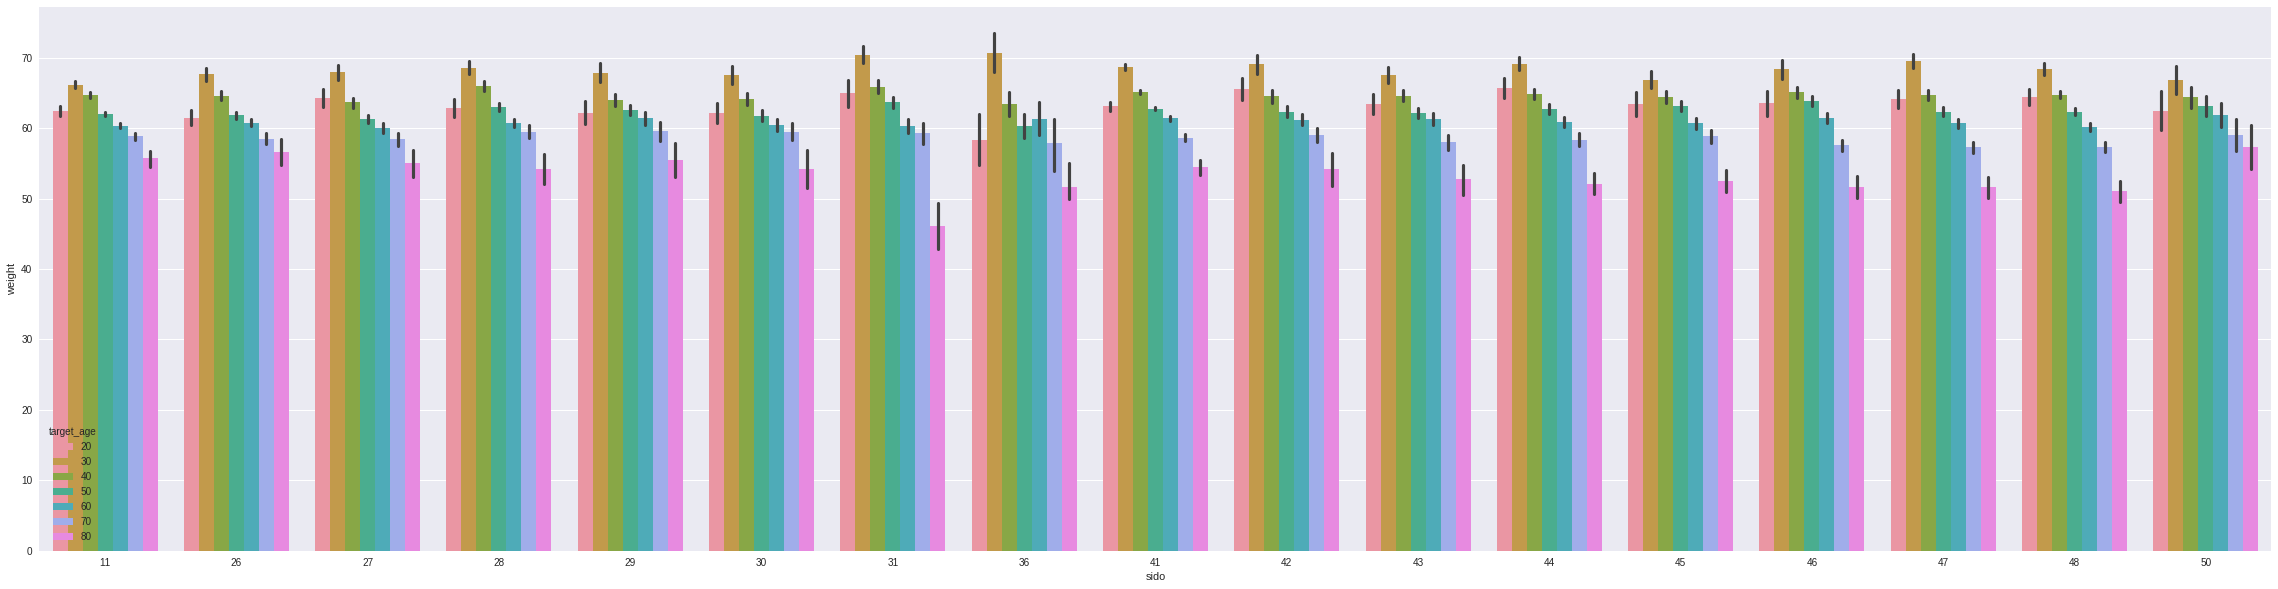

In [33]:
plt.figure(figsize=(40, 10))
sns.barplot(data=df_train, x='sido', y='weight', hue='target_age')

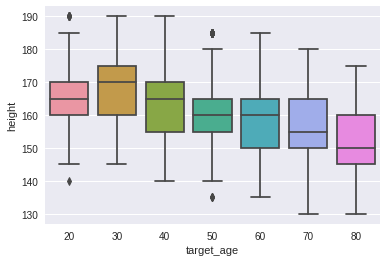

In [34]:
sns.boxplot(data=df_train, x='target_age', y='height')

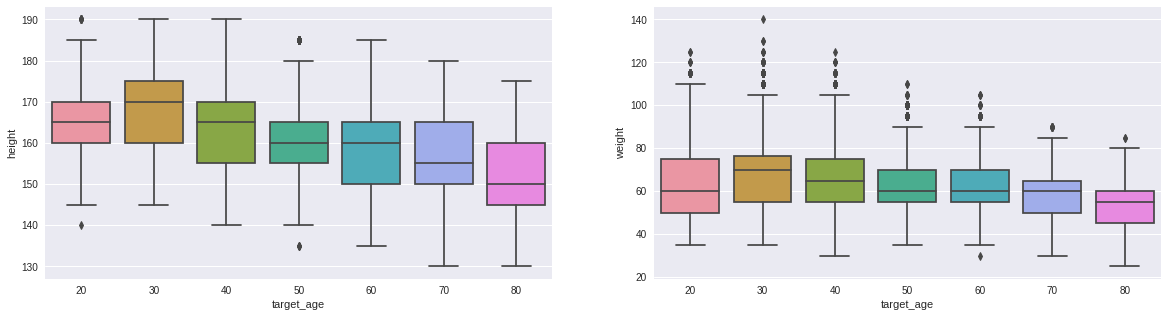

In [42]:
fig, ax = plt.subplots(ncols=2, figsize=(20,5))

sns.boxplot(data=df_train, x='target_age', y='height',ax=ax[0])
sns.boxplot(data=df_train, x='target_age', y='weight',ax=ax[1])

In [46]:
numerical_features = ['height', 'weight', 'waist', 'sight_L','sight_R',
            'bp_high', 'bp_low', 'blds', 'tot_chole', 'triglyceride', 'hdl_chole', 'ldl_chole', 
            'hmg', 'olig_prote_cd','creatinine', 'sgot_ast', 'sgot_alt', 'gamma_gtp', 'smk_type']

In [44]:
# f, ax = plt.subplots(4,5, figsize=(10,6))

# numerical_feature = ['height', 'weight', 'waist', 'sight_L','sight_R',
#             'bp_high', 'bp_low', 'blds', 'tot_chole', 'triglyceride', 'hdl_chole', 'ldl_chole', 
#             'hmg', 'olig_prote_cd','creatinine', 'sgot_ast', 'sgot_alt', 'gamma_gtp', 'smk_type']

# for i in range(len(numerical_feature)):
#     sns.barplot(data=df_train, x='target_sex',y= numerical_feature[i], ax=ax[i][])
# plt.show()

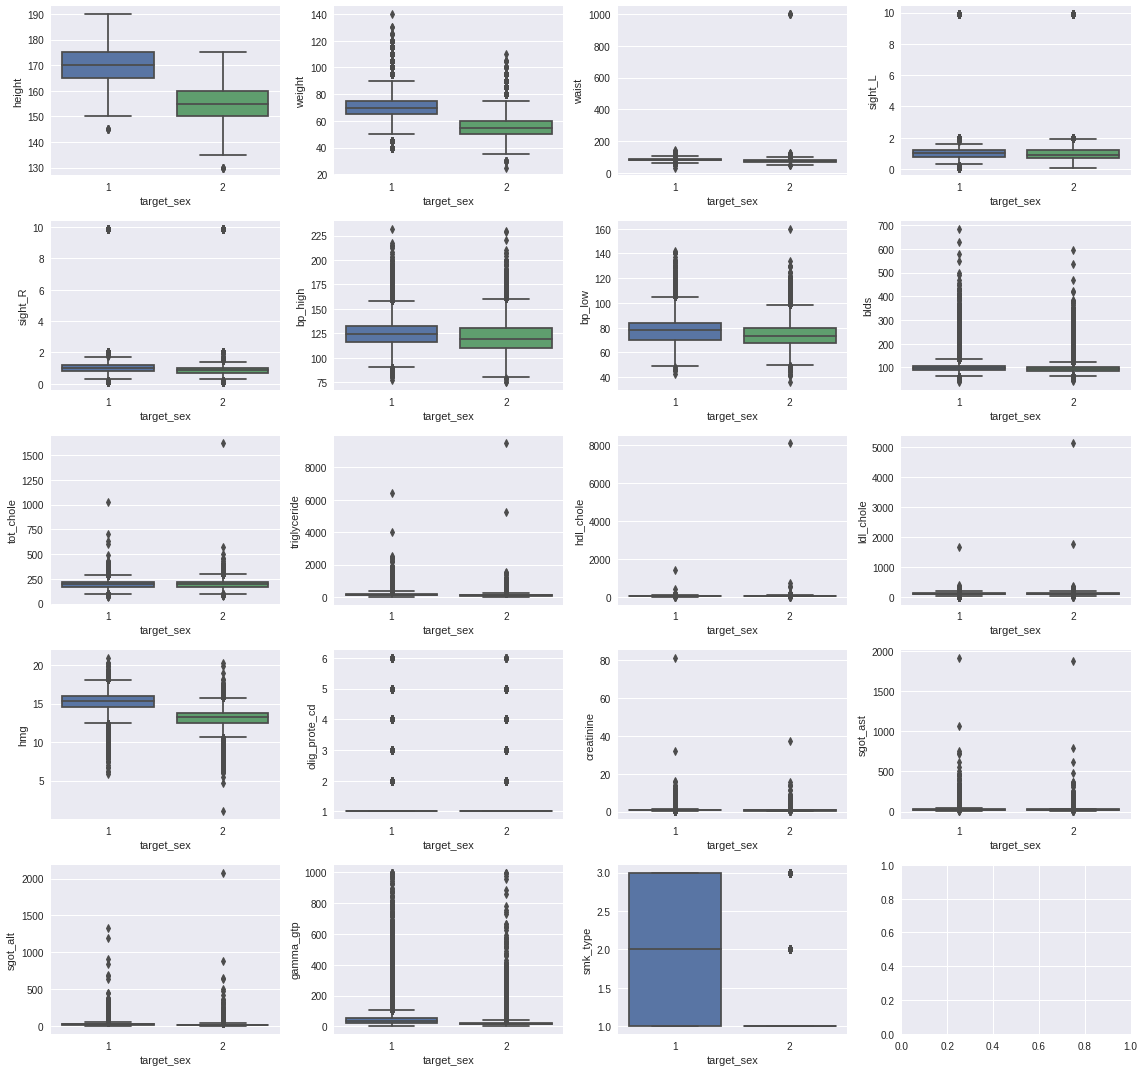

In [48]:
li_cat_feats = list(numerical_features)
nr_rows = 5
nr_cols = 4
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4, nr_rows*3))

for r in range(0, nr_rows):
    for c in range(0, nr_cols):
        i = r * nr_cols + c
        if i < len(li_cat_feats):
            sns.boxplot(data=df_train, x='target_sex', y = li_cat_feats[i], ax=axs[r][c])
plt.tight_layout()
plt.show()

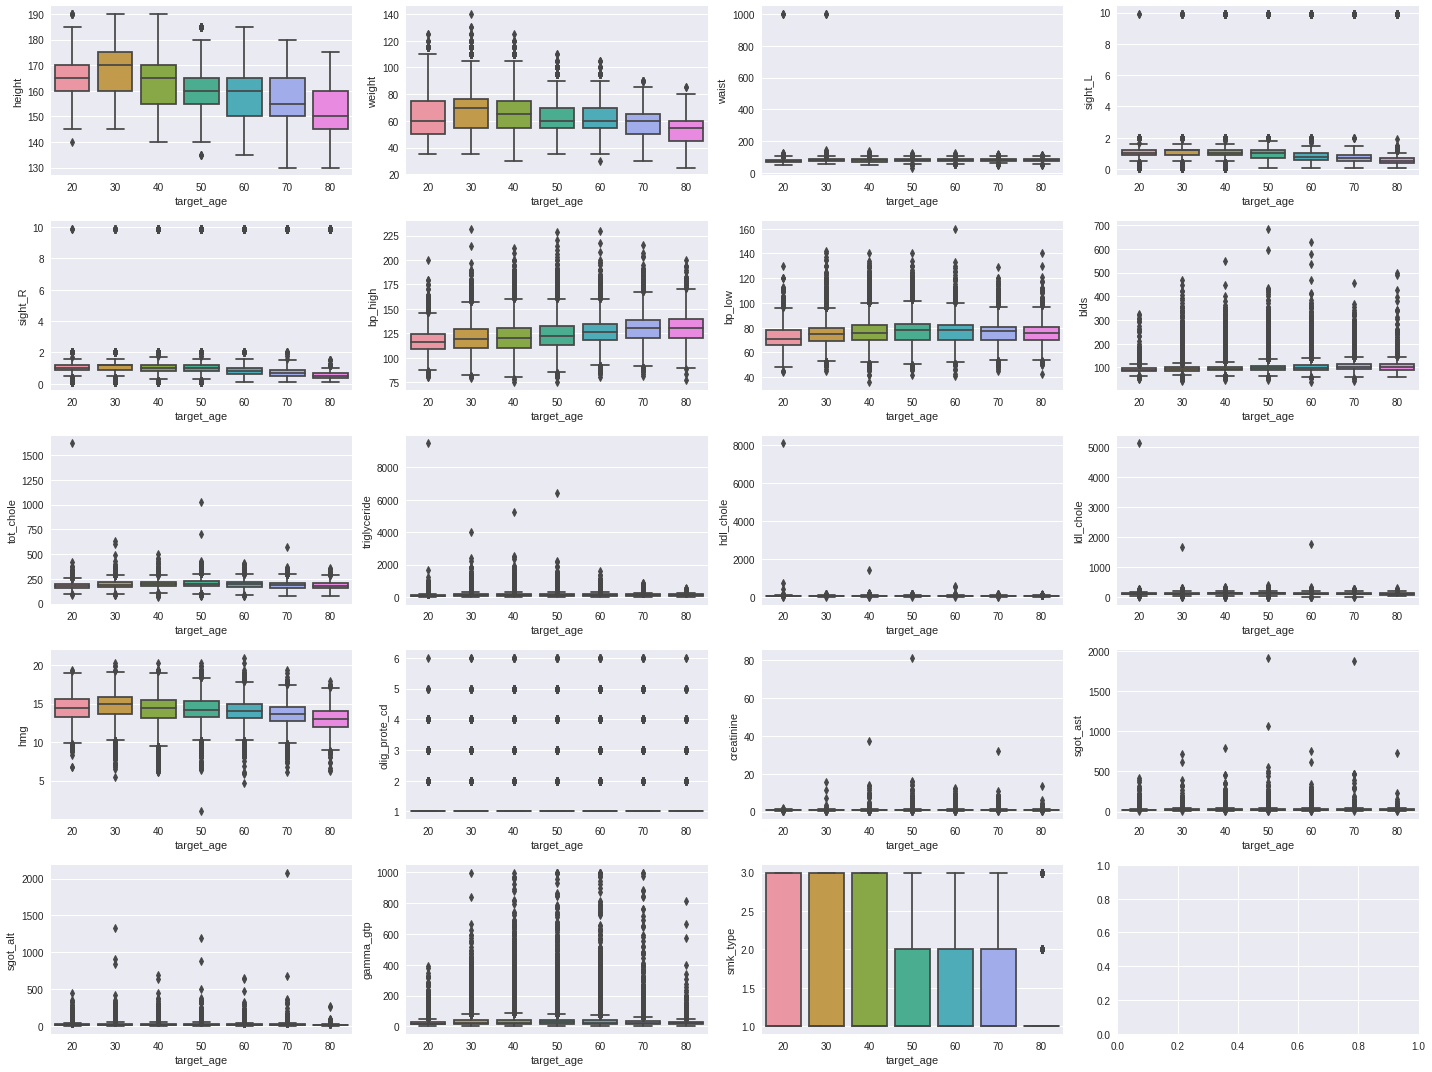

In [49]:
li_cat_feats = list(numerical_features)
nr_rows = 5
nr_cols = 4
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*5, nr_rows*3))

for r in range(0, nr_rows):
    for c in range(0, nr_cols):
        i = r * nr_cols + c
        if i < len(li_cat_feats):
            sns.boxplot(data=df_train, x='target_age', y = li_cat_feats[i], ax=axs[r][c])
plt.tight_layout()
plt.show()

In [ ]:
# 각 변수들의 정상치가 넘어가버리는 경우가 존재해서 특성별로 numerical 나눔
'''
numerical_features = ['height', 'weight', 'waist', 
'sight_L','sight_R',
            'bp_high', 'bp_low', 'blds', 'tot_chole', 'triglyceride', 'hdl_chole', 'ldl_chole', 
            'hmg', 'olig_prote_cd','creatinine', 'sgot_ast', 'sgot_alt', 'gamma_gtp', 'smk_type']

'''

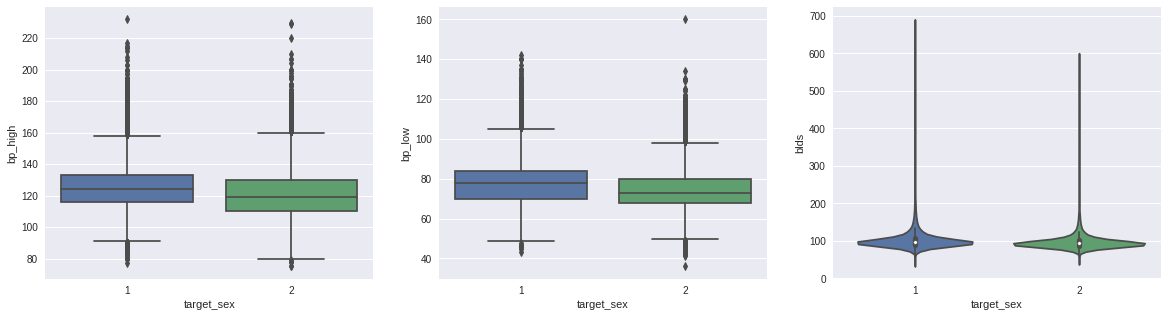

In [58]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

sns.boxplot(data=df_train, x='target_sex', y='bp_high', ax=ax[0])
sns.boxplot(data=df_train, x='target_sex', y='bp_low', ax=ax[1])
sns.violinplot(data=df_train, x='target_sex', y='blds', ax=ax[2]) 
# 성별간 차이가 별로 없음

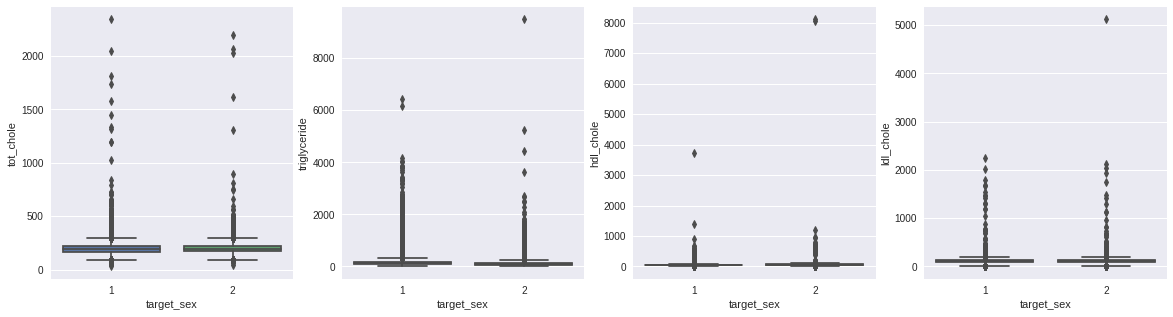

In [92]:
fig, ax = plt.subplots(ncols=4, figsize=(20,5))

sns.boxplot(data=df_train, x='target_sex', y='tot_chole', ax=ax[0])
sns.boxplot(data=df_train, x='target_sex', y='triglyceride', ax=ax[1])
sns.boxplot(data=df_train, x='target_sex', y='hdl_chole', ax=ax[2]) 
sns.boxplot(data=df_train, x='target_sex', y='ldl_chole', ax=ax[3])

# 정상치에 벗어나는 것들, 정상치에 벗어나지 않는 것들 파악해봄

In [66]:
# tot_chole 정상치 150~ 250
normal = df_train.loc[(df_train['tot_chole']>=150) & (df_train['tot_chole'] <= 250)]
normal

,year,id,target_sex,target_age,sido,height,weight,waist,sight_L,sight_R,...,hmg,olig_prote_cd,creatinine,sgot_ast,sgot_alt,gamma_gtp,smk_type,drk_yn,hchk_yn,ttr_yn
0,2017,1,1,30,43,170,75,90.0,1.0,1.0,...,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y,Y,Y
1,2017,2,1,30,11,180,80,89.0,0.9,1.2,...,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N,Y,NaN
3,2017,4,1,50,48,175,80,91.0,1.5,1.2,...,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N,Y,N
4,2017,6,1,50,41,165,55,75.0,1.2,1.5,...,13.8,3.0,0.8,29.0,40.0,37.0,3.0,Y,Y,NaN
5,2017,7,2,40,27,150,55,69.0,0.5,0.4,...,12.3,1.0,0.8,19.0,12.0,12.0,1.0,N,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101512,2017,112792,2,40,47,155,50,73.5,1.2,1.2,...,14.7,1.0,0.8,13.0,9.0,12.0,1.0,N,Y,N
101513,2017,112793,2,20,41,160,45,66.0,0.9,0.9,...,14.0,1.0,0.6,12.0,12.0,18.0,3.0,Y,N,NaN
101515,2017,112796,1,50,41,160,55,65.0,1.0,1.0,...,15.8,1.0,1.1,34.0,17.0,21.0,1.0,Y,N,NaN
101516,2017,112797,2,80,44,135,45,90.0,0.4,0.3,...,13.4,1.0,0.5,19.0,8.0,14.0,2.0,Y,Y,N


In [67]:
print("비정상 개수 : ",len(df_train)-len(normal))

비정상 개수 :  18372


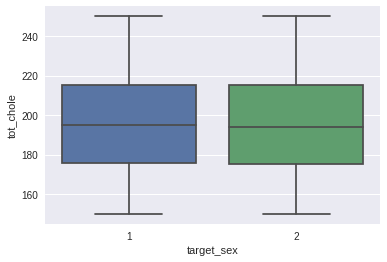

In [70]:
sns.boxplot(data=normal, x='target_sex', y='tot_chole')

In [93]:
# 정상치만 모아볼까
normal = df_train.loc[((df_train['tot_chole']>=150) & (df_train['tot_chole'] <= 250))&((df_train['triglyceride']>=30) & (df_train['triglyceride'] <= 135))&((df_train['hdl_chole']>=30) & (df_train['hdl_chole'] <= 65))]
normal

,year,id,target_sex,target_age,sido,height,weight,waist,sight_L,sight_R,...,hmg,olig_prote_cd,creatinine,sgot_ast,sgot_alt,gamma_gtp,smk_type,drk_yn,hchk_yn,ttr_yn
0,2017,1,1,30,43,170,75,90.0,1.0,1.0,...,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y,Y,Y
1,2017,2,1,30,11,180,80,89.0,0.9,1.2,...,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N,Y,NaN
6,2017,8,1,30,48,175,65,84.2,1.2,1.0,...,14.4,1.0,0.8,18.0,18.0,35.0,3.0,Y,Y,N
7,2017,9,1,50,41,170,75,84.0,1.2,0.9,...,15.1,1.0,0.8,32.0,23.0,26.0,1.0,Y,Y,Y
8,2017,10,1,40,41,175,75,82.0,1.5,1.5,...,13.9,1.0,0.9,21.0,38.0,16.0,2.0,Y,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899987,2017,999987,2,30,11,155,65,70.0,0.7,0.9,...,12.9,1.0,1.0,25.0,12.0,13.0,1.0,Y,N,NaN
899988,2017,999988,1,40,41,170,75,83.0,1.2,1.2,...,13.5,1.0,0.7,19.0,16.0,23.0,3.0,Y,Y,Y
899992,2017,999992,2,30,41,165,70,81.0,1.0,1.0,...,13.3,1.0,0.7,20.0,17.0,12.0,1.0,N,N,NaN
899994,2017,999994,1,70,42,165,60,78.0,0.9,0.8,...,16.1,1.0,1.0,23.0,13.0,32.0,1.0,Y,Y,Y


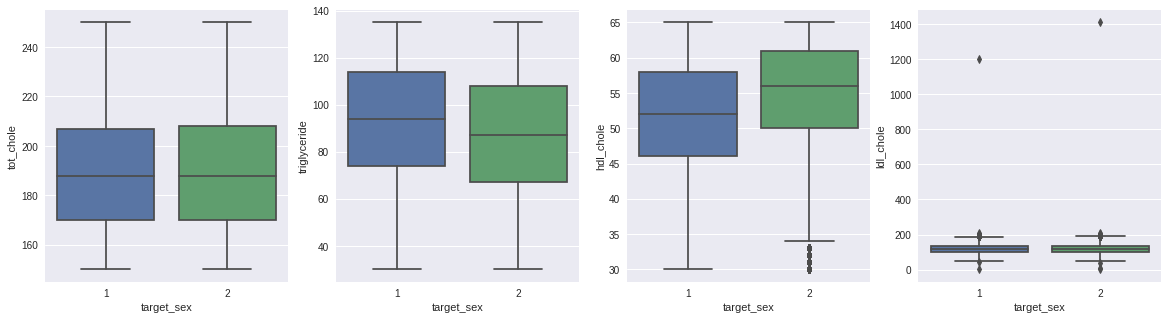

In [94]:
fig, ax = plt.subplots(ncols=4, figsize=(20,5))

sns.boxplot(data=normal, x='target_sex', y='tot_chole', ax=ax[0])
sns.boxplot(data=normal, x='target_sex', y='triglyceride', ax=ax[1])
sns.boxplot(data=normal, x='target_sex', y='hdl_chole', ax=ax[2]) 
sns.boxplot(data=normal, x='target_sex', y='ldl_chole', ax=ax[3])

In [95]:
# triglyceride 정상치 30~135
normal = df_train.loc[(df_train['triglyceride']>= 30) & (df_train['triglyceride']<= 135)]
print("정상 : %s개 \n 비정상 : %s개" %(len(normal),len(df_train)-len(normal)))

정상 : 589154개 
 비정상 : 310846개


In [96]:
# hdl_chole 정상치 30~65
normal = df_train.loc[(df_train['hdl_chole']>= 30) &(df_train['hdl_chole']<= 65)]
print("정상 : %s개 \n 비정상 : %s개" %(len(normal),len(df_train)-len(normal)))

정상 : 666094개 
 비정상 : 233906개


In [97]:
len(normal) + (len(df_train)-len(normal))

900000

In [133]:
# id_chole는 170이상은 고LDL혈증임

abnormal =  df_train.loc[(df_train['ldl_chole']>= 170)]
print(len(abnormal))

51301


In [103]:
# 성별과 연령대에 따라 확인
# 비율 확인

abnormal.groupby('target_sex')['ldl_chole'].count()

target_sex
1    25744
2    25557
Name: ldl_chole, dtype: int64

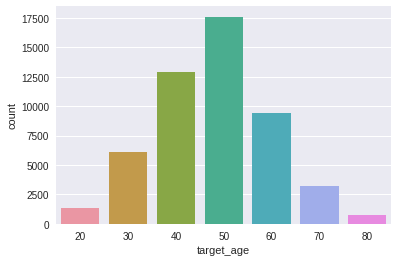

In [106]:
sns.countplot(data=abnormal, x='target_age')
# 근데 카운트만 보면 좀 ... 그건데 워낙 인원수가 일정하지 않으니까

In [135]:
print("남성의 ldl_chole 비정상 비율 : ",100*len(abnormal.loc[(abnormal['target_sex']==1)]) / len(df_train.loc[(df_train['target_sex']==1)]))
print("여성의 ldl_chole 비정상 비율 : ",100*len(abnormal.loc[(abnormal['target_sex']==2)]) / len(df_train.loc[(df_train['target_sex']==2)]))

남성의 ldl_chole 비정상 비율 :  5.393650141838919
여성의 ldl_chole 비정상 비율 :  6.046160615853399


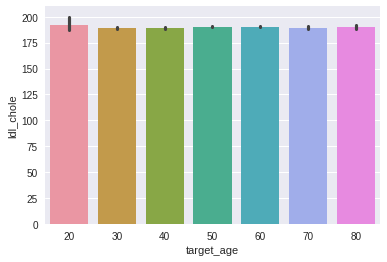

In [107]:
sns.barplot(data=abnormal, x='target_age', y='ldl_chole') # 평균적으로 걍 170을 넘긴하지만 별 거는 없음

In [155]:
abnormal['target_age'].value_counts().sort_values()

80      730
20     1344
70     3186
30     6130
60     9421
40    12889
50    17601
Name: target_age, dtype: int64

In [154]:
age_list = abnormal['target_age'].value_counts().sort_values(ascending=False).index # 이렇게 해도 의미가 없긴 하네

for i in range(len(age_list)):
  print(age_list[i], 'Percent of abnormal value : {:.2f}'.format(100*len(abnormal.loc[(abnormal['target_age']==age_list[i])]) / len(df_train.loc[(df_train['target_age']==age_list[i])])))
  

50 Percent of abnormal value : 8.07
40 Percent of abnormal value : 5.71
60 Percent of abnormal value : 6.53
30 Percent of abnormal value : 4.16
70 Percent of abnormal value : 4.59
20 Percent of abnormal value : 1.72
80 Percent of abnormal value : 4.30


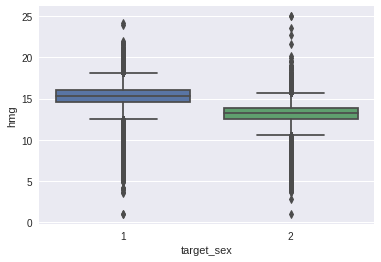

In [108]:
# 혈색소

sns.boxplot(data=df_train, x='target_sex', y='hmg')

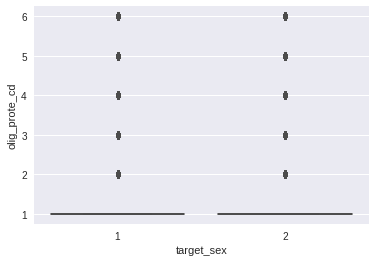

In [109]:
# 요단백 - 범주형 중에서도 순위 척도를 나타냄

sns.boxplot(data=df_train, x='target_sex', y='olig_prote_cd')

In [112]:
pd.crosstab(df_train['target_sex'],df_train['olig_prote_cd'], margins=True)

olig_prote_cd,1.0,2.0,3.0,4.0,5.0,6.0,All
target_sex,,,,,,,
1,446966,15398,8422,3537,1140,311,475774
2,397979,12545,6409,2318,651,150,420052
All,844945,27943,14831,5855,1791,461,895826


In [114]:
pd.crosstab(df_train['target_age'], df_train['olig_prote_cd'], margins=True)

olig_prote_cd,1.0,2.0,3.0,4.0,5.0,6.0,All
target_age,,,,,,,
20,74104,2410,1120,286,79,15,78014
30,139108,4928,1874,542,152,35,146639
40,212167,7491,3373,1194,344,78,224647
50,205665,6355,3561,1416,454,131,217582
60,135247,3963,2721,1312,399,104,143746
70,63652,2197,1676,849,275,69,68718
80,15002,599,506,256,88,29,16480
All,844945,27943,14831,5855,1791,461,895826


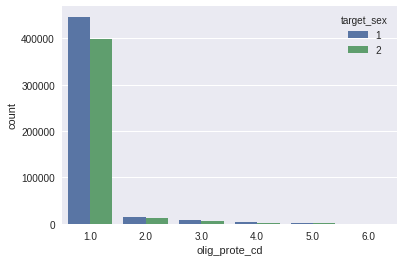

In [113]:
sns.countplot(data=df_train, x='olig_prote_cd', hue='target_sex')

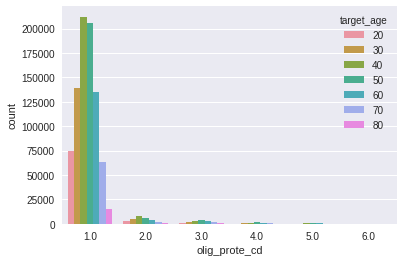

In [115]:
sns.countplot(data=df_train, x='olig_prote_cd', hue='target_age')

In [182]:
# creatinine 정상치 0.8~ 1.7

abnormal = df_train.loc[-((df_train['creatinine']>= 0.8) & (df_train['creatinine']<= 1.7))]
print("비정상 : %s " %len(abnormal))
print("정상 : %s" %(len(df_train)-len(abnormal)))

비정상 : 293336 
정상 : 606664


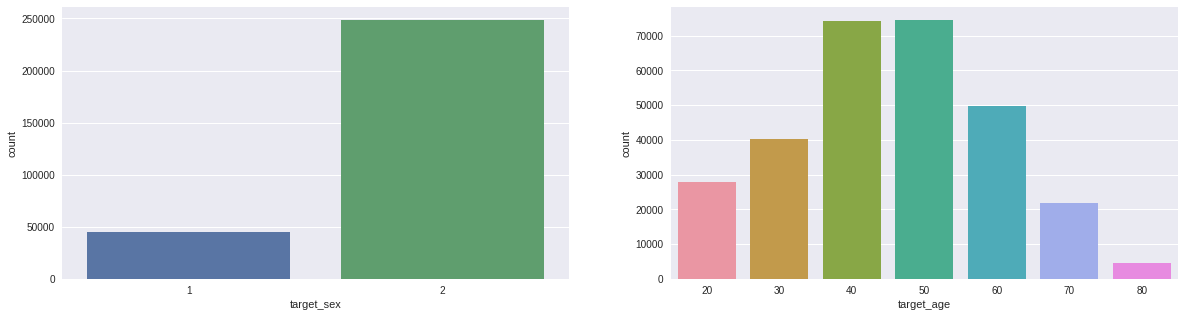

In [183]:
fig, ax = plt.subplots(ncols=2, figsize=(20,5))

sns.countplot(data=abnormal, x='target_sex', ax=ax[0]) # 비정상 수적으로 여자가 더 많음
sns.countplot(data=abnormal, x='target_age', ax=ax[1])

In [184]:
# 성별 비율로 보고파 

print("남성의 creatinine abnormal percent : ",100*len(abnormal.loc[(abnormal['target_sex']==1)]) / len(df_train.loc[(df_train['target_sex']==1)]))
print("여성의 ceratinine abnormal percent : ",100*len(abnormal.loc[(abnormal['target_sex']==2)]) / len(df_train.loc[(df_train['target_sex']==2)]))

# 여성이 creatinine 비정상에 취약함 - 크게 작용할 것으로 예상

남성의 creatinine abnormal percent :  9.382948322026726
여성의 ceratinine abnormal percent :  58.80108256958869


In [185]:
# 나이대 비율로 보고파

age_list = abnormal['target_age'].value_counts().sort_values(ascending=False).index # 이렇게 해도 의미가 없긴 하네

for i in range(len(age_list)):
  print(age_list[i], 'Percent of abnormal value : {:.2f}'.format(100*len(abnormal.loc[(abnormal['target_age']==age_list[i])]) / len(df_train.loc[(df_train['target_age']==age_list[i])])))


# 20대가 높긴하지만 80대와 비교했을 때 8퍼 가량 차이

50 Percent of abnormal value : 34.17
40 Percent of abnormal value : 32.96
60 Percent of abnormal value : 34.42
30 Percent of abnormal value : 27.33
20 Percent of abnormal value : 35.75
70 Percent of abnormal value : 31.54
80 Percent of abnormal value : 27.24


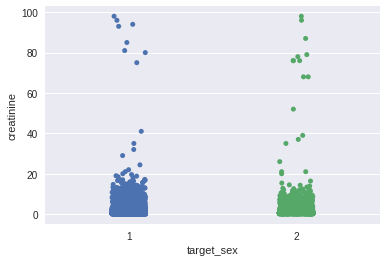

In [186]:
# 얼만큼 있는지 scattor로 보고 싶지 않니?

sns.stripplot(data=abnormal, x='target_sex', y='creatinine') # 범주형이라 에바다

In [187]:
# 그렇다면 value_counts()

abnormal['creatinine'].value_counts()

# 정상치인 0.8보다 상대적으로 낮은 값들이 존재
# 기준치 이상은 도대체 어떤 사람인겨

0.7     149263
0.6      99222
0.5      35359
0.4       5469
0.3        552
         ...  
24.4         1
19.0         1
87.0         1
93.0         1
15.1         1
Name: creatinine, Length: 180, dtype: int64

In [234]:
# sgot_ast의 정상치 0~40 -> 비정상 하나도 없는디? -> 전체 괄호하고 -했어야 함 ...!!!!!!!!!!!!1
# loc는 null값 포함시킴

abnormal = df_train.loc[-((df_train['sgot_ast']>= 0) & (df_train['sgot_ast']<= 40))]
print("비정상 : %s " %len(abnormal))
print("정상 : %s" %(len(df_train)-len(abnormal)))

비정상 : 66288 
정상 : 833712


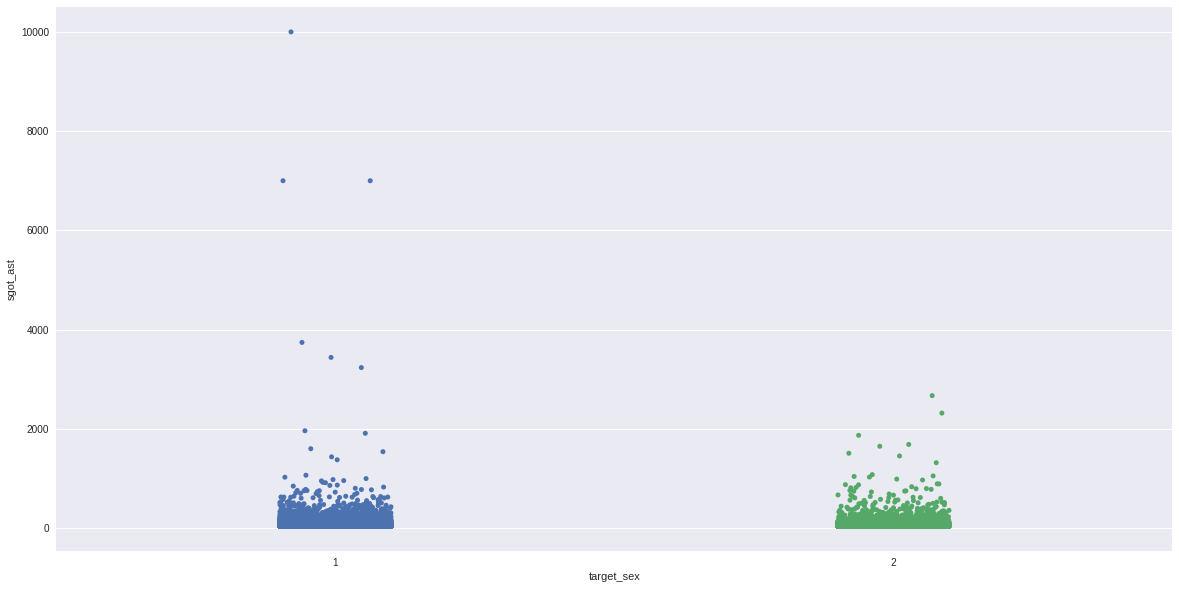

In [238]:
plt.figure(figsize=(20,10))

sns.stripplot(data=abnormal, x='target_sex', y='sgot_ast')
# 1000값을 가지는건 도대체 뭐야?

In [204]:
b = df_train[(df_train['sgot_ast']>40)]
print(len(b)) # 도대체 왜 차이가 나는거야?

66250


In [233]:
# 바로바로 결측치의 갯수 때문이였다

print(df_train['sgot_ast'].isnull().sum())
print(66288-66250)

38
38


In [239]:
print("남성의 sgot_ast abnormal percent : ",100*len(abnormal.loc[(abnormal['target_sex']==1)]) / len(df_train.loc[(df_train['target_sex']==1)]))
print("여성의 sgot_ast abnormal percent : ",100*len(abnormal.loc[(abnormal['target_sex']==2)]) / len(df_train.loc[(df_train['target_sex']==2)]))

# 남성이 더 높고 이상치값도 존재함

남성의 sgot_ast abnormal percent :  9.746240325831444
여성의 sgot_ast abnormal percent :  4.676861494494887


In [240]:
# 나이대 비율로 보고파

age_list = abnormal['target_age'].value_counts().sort_values(ascending=False).index # 이렇게 해도 의미가 없긴 하네

for i in range(len(age_list)):
  print(age_list[i], 'Percent of abnormal value : {:.2f}'.format(100*len(abnormal.loc[(abnormal['target_age']==age_list[i])]) / len(df_train.loc[(df_train['target_age']==age_list[i])])))

# 5,60대가 제일 높고 20대가 제일 낮음

50 Percent of abnormal value : 8.29
40 Percent of abnormal value : 6.99
60 Percent of abnormal value : 8.83
30 Percent of abnormal value : 6.90
70 Percent of abnormal value : 7.65
20 Percent of abnormal value : 4.17
80 Percent of abnormal value : 5.64


In [241]:
# sgot_alt의 정상치 0~40

abnormal = df_train.loc[-((df_train['sgot_alt']>= 0) & (df_train['sgot_alt']<= 40))]
print("비정상 : %s " %len(abnormal))
print("정상 : %s" %(len(df_train)-len(abnormal)))

비정상 : 112126 
정상 : 787874


In [246]:
# 비율로 보고파요

print("남성의 sgot_alt abnormal percent : ",100*len(abnormal.loc[(abnormal['target_sex']==1)]) / len(df_train.loc[(df_train['target_sex']==1)]))
print("여성의 sgot_alt abnormal percent : ",100*len(abnormal.loc[(abnormal['target_sex']==2)]) / len(df_train.loc[(df_train['target_sex']==2)]))

# 남성에게서 높은 비율로 발생

남성의 sgot_alt abnormal percent :  18.439059547204913
여성의 sgot_alt abnormal percent :  5.705255288645795


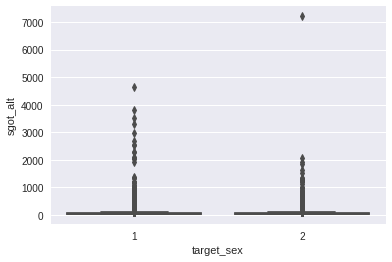

In [245]:
sns.boxplot(data=abnormal, x='target_sex', y='sgot_alt')
# 여성에게서 이상치 발견

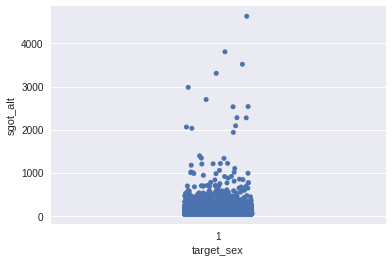

In [251]:
sns.stripplot(data = abnormal.loc[abnormal['target_sex']==1], x='target_sex', y ='sgot_alt')

In [253]:
# 나이대 비교

age_list = abnormal['target_age'].value_counts().index 

for i in range(len(age_list)):
  print(age_list[i], 'Percent of abnormal value : {:.2f}'.format(100*len(abnormal.loc[(abnormal['target_age']==age_list[i])]) / len(df_train.loc[(df_train['target_age']==age_list[i])])))

# 20대 ~30대 갈수록 급증, 이후 점차 감소하는 추세
# 나이대에 좀 영향을 받는다 할 수 있음

40 Percent of abnormal value : 13.90
50 Percent of abnormal value : 12.47
30 Percent of abnormal value : 17.23
60 Percent of abnormal value : 10.49
20 Percent of abnormal value : 9.49
70 Percent of abnormal value : 7.17
80 Percent of abnormal value : 3.79


In [ ]:
# gamma_gtp 정상치 남자 11~39, 여자 8~ 35

abnormal = df_train.loc[-((df_train['sgot_alt']>= 0) & (df_train['sgot_alt']<= 40))]
print("비정상 : %s " %len(abnormal))
print("정상 : %s" %(len(df_train)-len(abnormal)))

In [273]:
# 비정상 찾기 인데
a = df_train[df_train['target_sex']==1].loc[-((df_train['gamma_gtp'] >=11)&(df_train['gamma_gtp']<=39))]
a.head()

,year,id,target_sex,target_age,sido,height,weight,waist,sight_L,sight_R,...,hmg,olig_prote_cd,creatinine,sgot_ast,sgot_alt,gamma_gtp,smk_type,drk_yn,hchk_yn,ttr_yn
0,2017,1,1,30,43,170,75,90.0,1.0,1.0,...,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y,Y,Y
2,2017,3,1,40,41,165,75,91.0,1.2,1.5,...,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N,N,NaN
10,2017,12,1,60,27,155,75,98.0,1.2,9.9,...,16.5,1.0,1.3,48.0,51.0,42.0,2.0,N,N,NaN
16,2017,19,1,50,41,170,85,99.0,0.7,0.8,...,14.4,1.0,1.2,41.0,51.0,60.0,1.0,Y,N,NaN
17,2017,20,1,60,44,165,60,85.0,0.3,0.7,...,15.2,1.0,1.0,19.0,20.0,48.0,3.0,Y,N,NaN


In [308]:
ab_man = df_train[df_train['target_sex']==1].loc[-((df_train['gamma_gtp'] >=11)&(df_train['gamma_gtp']<=39))]
ab_wom = df_train[df_train['target_sex']==2].loc[-((df_train['gamma_gtp'] >=8)&(df_train['gamma_gtp']<=35))]

print(len(ab_man), len(ab_wom))
print(188456+55359)

188456 55359
243815


In [309]:
abnormal = pd.concat([ab_man, ab_wom],axis=0)
print(len(abnormal))

243815


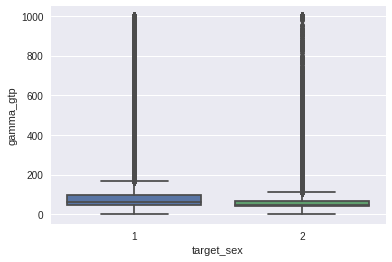

In [310]:
sns.boxplot(data=abnormal, x='target_sex', y='gamma_gtp')

In [287]:
# 성별 비율을 보자

print("남성의 gamma_gtp abnormal percent : ",100*len(abnormal.loc[(abnormal['target_sex']==1)]) / len(df_train.loc[(df_train['target_sex']==1)]))
print("여성의 gamma_gtp abnormal percent : ",100*len(abnormal.loc[(abnormal['target_sex']==2)]) / len(df_train.loc[(df_train['target_sex']==2)]))

# 남성의 비율이 높다

남성의 gamma_gtp abnormal percent :  39.48359738697931
여성의 gamma_gtp abnormal percent :  13.096584322613309


In [317]:
# 나이대별

age_list = abnormal['target_age'].value_counts().index 

for i in range(len(age_list)):
  age = '{:}대 Percent of abnormal value : {:.2f}'.format(age_list[i], 100*len(abnormal.loc[(abnormal['target_age']==age_list[i])]) / len(df_train.loc[(df_train['target_age']==age_list[i])]))
  print(age)

# 4,50대가 제일 높고 가까워질수록 높아짐, 그리고 나이들수록 적어짐

40대 Percent of abnormal value : 30.15
50대 Percent of abnormal value : 30.19
30대 Percent of abnormal value : 29.19
60대 Percent of abnormal value : 25.98
70대 Percent of abnormal value : 20.69
20대 Percent of abnormal value : 15.75
80대 Percent of abnormal value : 16.34


In [289]:
# smk_type - 성별, 나이로 담배 피는 현황 살펴볼 것임

pd.crosstab(df_train['target_sex'],df_train['smk_type'], margins=True)

smk_type,1.0,2.0,3.0,All
target_sex,,,,
1,149342,148660,179261,477263
2,397927,9885,14793,422605
All,547269,158545,194054,899868


In [297]:
# for col in df_train.columns:
#     msperc = 'column: {:>10}\t NaN value: {:d}'.format(col, df_train[col].isnull().sum())
#     print(msperc)

df_train['smk_type'].isnull().sum()

# 132개의 결측치

132

In [324]:
"""
1, 2 - 현재 피지 않음
3 - 흡연상태
"""

type0 = df_train.loc[-(df_train['smk_type']==3)] # 여기에 결측치 포함되어 있음
type1 = df_train.loc[df_train['smk_type']==3]
print(len(type0)) # 안피는 사람 
print(len(type1)) # 피는 사람

# 이거 합쳐도 되겄다?

705946
194054


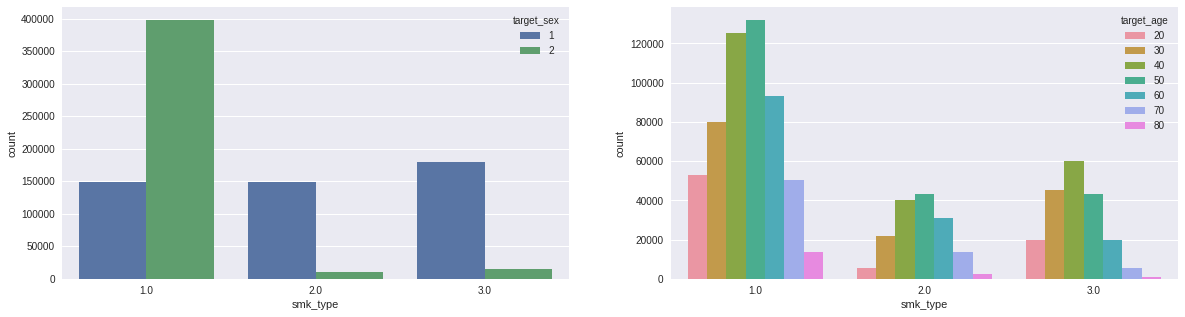

In [328]:
fig, ax = plt.subplots(ncols=2, figsize=(20,5))

sns.countplot(data=df_train, x='smk_type', hue='target_sex', ax=ax[0])
sns.countplot(data=df_train, x='smk_type', hue='target_age', ax=ax[1])

# 흡연을 안하는 사람은 남성보다 여성이 수적으로 더 높음
# 안하는 사람들 중 50대가 제일 많음

In [333]:
print("남성의 흡연 비율 : ",100*len(type1.loc[(type1['target_sex']==1)]) / len(df_train.loc[(df_train['target_sex']==1)]))
print("여성의 흡연 비율 : ",100*len(type1.loc[(type1['target_sex']==2)]) / len(df_train.loc[(df_train['target_sex']==2)]))

# 남성 흡연 비율이 압도적으로 높음
# 그 중 어느 연령대가 제일 높을까?


남성의 흡연 비율 :  37.55714411420861
여성의 흡연 비율 :  3.4996616970035346


In [ ]:
# # 남성의 흡연  - 집에서 해보셔
# df_man = df_train.loc[(df['target_sex']==1)] # 흡연하는 남성
# age_list = type1['target_age'].value_counts().index

# for i in range(len(age_list)):
#   print(age_list[i], 'Percent of smoke : {:.2f}'.format(100*len(type0.loc[((type1['target_sex']==1)&(type1['target_age']==age_list[i]))]) / len(df_train.loc[(df_train['target_age']==age_list[i])])))

In [329]:
# 비율로 볼 것이여
# type0 : 안하는 사람

age_list = type0['target_age'].value_counts().index

for i in range(len(age_list)):
  print(age_list[i], 'Percent of abnormal value : {:.2f}'.format(100*len(type0.loc[(type0['target_age']==age_list[i])]) / len(df_train.loc[(df_train['target_age']==age_list[i])])))

# 안하는 비율은 7,80대 높고
# 30대가 제일 많이 흡연 중
# 그 중에 어느 성별인지 보고 싶은데 

50 Percent of abnormal value : 80.27
40 Percent of abnormal value : 73.28
60 Percent of abnormal value : 86.39
30 Percent of abnormal value : 69.26
70 Percent of abnormal value : 92.37
20 Percent of abnormal value : 74.75
80 Percent of abnormal value : 95.61


In [332]:
print("남성의 gamma_gtp abnormal percent : ",100*len(abnormal.loc[(abnormal['target_sex']==1)]) / len(df_train.loc[(df_train['target_sex']==1)]))
print("여성의 gamma_gtp abnormal percent : ",100*len(abnormal.loc[(abnormal['target_sex']==2)]) / len(df_train.loc[(df_train['target_sex']==2)]))


target_age
20     58566
30    101980
40    165273
50    175070
60    124622
70     64071
80     16232
Name: smk_type, dtype: int64